<a href="https://colab.research.google.com/github/AnnisaFitry/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 5

    Nama : Annisa Fitri Yuliandra
    Kelas : 3B
    Jurusan : Teknologi Informasi
    Prodi : D4 Teknik Informatika

**Tujuan**

- Mahasiswa dapat membuat aplikasi Gamma Correction
- Mahasiswa dapat membuat simulasi Citra dengan image depth yang ditentukan
- Mahasiswa dapat melakukan denoising dengan menggunakan Averaging
- Mahasiswa dapat melakukan image masking menggunakan logical operator

# TUGAS PRAKTIKUM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # Menampilkan image
from skimage import io
import matplotlib.pylab as plt

1. **Buat Gamma Correction sesuai dengan petunjuk berikut.** Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
---------------------------------------------------------
Masukkan nilai gamma : 3


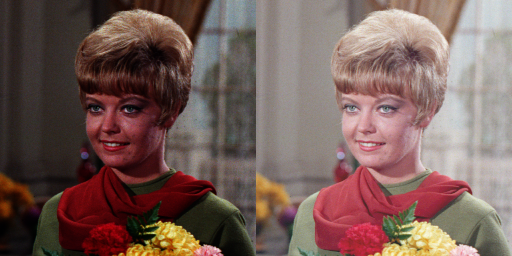

In [ ]:
# 3. Implementasi Gamma Correction

print(' Gamma Correction pada citra ')
print('---------------------------------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma : '))
except ValueError:
  print('Error, tolong masukkan angka!')

gambar_asli = cv.imread('/content/drive/MyDrive/images/female.tiff')

def gammaCorrection(gambar_asli, gamma):
    gamma_level = 1/gamma

    gambar_gamma = [((i / 255) ** gamma_level) * 255 for i in range(256)]
    gambar_gamma = np.array(gambar_gamma, np.uint8)

    return cv.LUT(gambar_asli, gambar_gamma)

gamma_hasil = gammaCorrection(gambar_asli, gamma)

akhir_gambar_1 = cv.hconcat((gambar_asli, gamma_hasil))
cv2_imshow(akhir_gambar_1)

2. **Buat Simulasi Image Depth.** Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

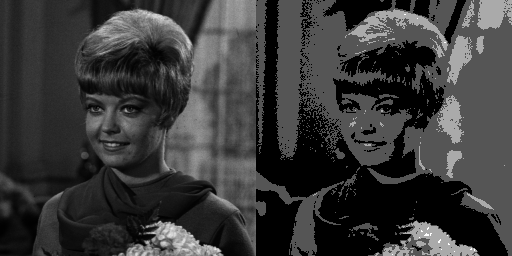

In [ ]:
# Mendefinisikan nilai bit depth
bit_depth = 2

# Menghitung level
level = 255 / (pow(2,bit_depth)-1)

# Membaca citra
original = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra baru dengan nilai kedalaman yang ditentukan
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round(original[i,j] / level) * level

akhir_gambar_2 = cv.hconcat((original, depth_image))
cv2_imshow(akhir_gambar_2)


3. **Buat modul Average Denoising.** Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub babsebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg. Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).
        cv_img = []
        for img in glob.glob(''):
        n= cv.imread(img)
        cv_img.append(n)
Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

In [ ]:
import glob
import math
# cv_img = []
# # for img in glob.glob('/content/drive/MyDrive/images/noises/*.jpg'):
# #   n= cv.imread(img)
# #   cv_img.append(n)

img = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')
noise = cv.imread('/content/drive/MyDrive/images/noises/1.jpg')
def PSNR(img, noise):
  mse = np.mean((img - noise) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

hasil_psnr = PSNR(img, noise)
print(hasil_psnr)

27.89458386408255


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

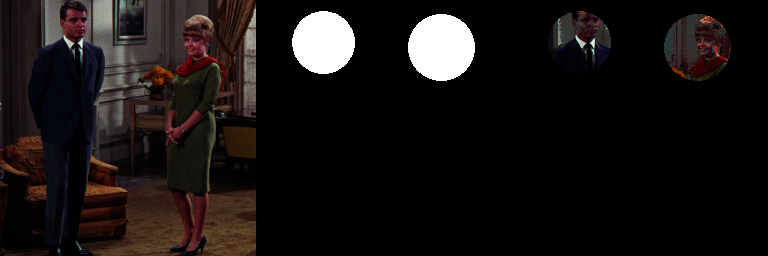

In [ ]:
gambar = cv.imread('/content/drive/MyDrive/images/couple.tiff')
gambar_mono = cv.imread('/content/drive/MyDrive/images/xxx.tiff')
gambar = gambar.astype(np.float32)
gambar_mono = gambar_mono.astype(np.float32)

# Melakukan operasi AND pada kedua citra
result_and = cv.bitwise_and(gambar, gambar_mono)

hasil_gambar_and = cv.hconcat((gambar, gambar_mono, result_and))
cv2_imshow(hasil_gambar_and)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

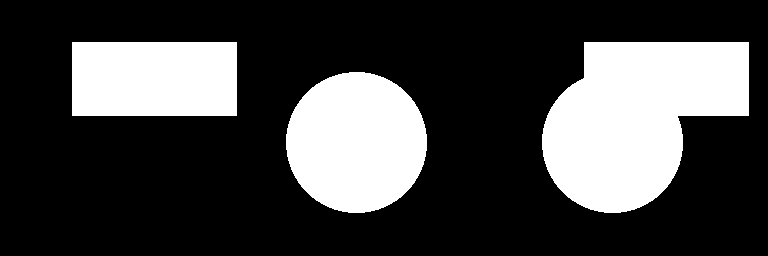

In [ ]:
g1 = cv.imread('/content/drive/MyDrive/images/g1.tiff')
g2 = cv.imread('/content/drive/MyDrive/images/g2.tiff')
g1 = g1.astype(np.float32)
g2 = g2.astype(np.float32)

# Melakukan operasi OR pada kedua citra
result_or = cv.bitwise_or(g1, g2)
hasil_gambar_or = cv.hconcat((g1, g2, result_or))
cv2_imshow(hasil_gambar_or)

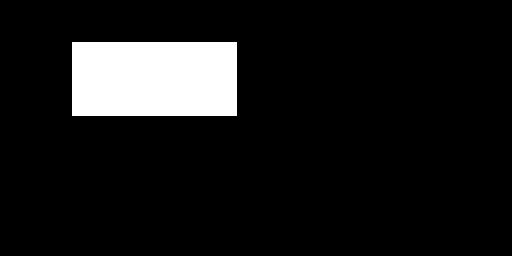

In [ ]:
# Melakukan operasi NOT pada kedua citra
result_not = cv.bitwise_not(g1)
hasil_gambar_not = cv.hconcat((g1, result_not))
cv2_imshow(hasil_gambar_not)

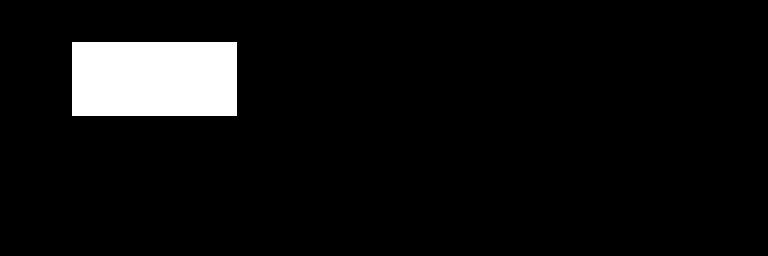

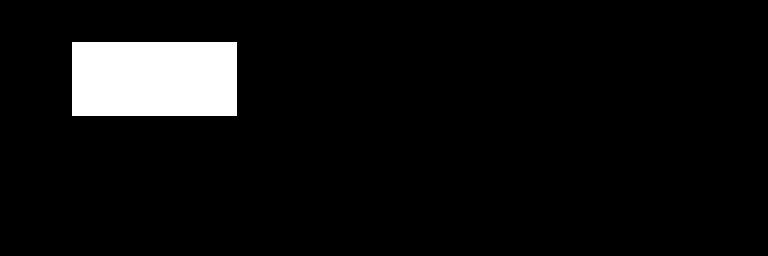

In [ ]:
# Melakukan operasi XOR pada kedua citra
result_xor = cv.bitwise_xor(g1, g2)
hasil_gambar_xor = cv.hconcat((g1, g2, result_xor))
cv2_imshow(hasil_gambar_xor)

# Melakukan operasi NAND pada kedua citra
result_nand = cv.bitwise_not(result_xor)
hasil_gambar_nand = cv.hconcat((g1, g2, result_nand))
cv2_imshow(hasil_gambar_nand)